# Customer Churn Prediction in the Indian Telecom Sector

## Objective

The goal of this project is to predict customer churn in the Indian telecom sector using demographic and usage data. You will explore data science techniques to build predictive models and determine which factors are most influential in customer churn. Additionally, you will compare the performance of two encoding methods -- `OneHotEncoder` and `LabelEncoder` -- and evaluate their effect on model performance.

## Scenario

The telecommunications sector in India is rapidly evolving, with many businesses being created and customers frequently switching between providers. **Churn** refers to the process where customers stop using a company's services or products. It is a key challenge for telecom companies to predict and minimize customer churn, as retaining customers is critical to business growth.

## 1. Data Preprocessing

In [125]:
import pandas as pd
import numpy as np

In [126]:
# Load datasets
demographics_df = pd.read_csv('telecom_demographics.csv')
usage_df = pd.read_csv('telecom_usage.csv')

In [127]:
# Merge the datasets on 'customer_id'
merged_df = pd.merge(demographics_df, usage_df, on='customer_id')
merged_df.sample(5)

,customer_id,telecom_partner,gender,age,state,city,pincode,registration_event,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
5269,113953,Reliance Jio,F,21,Odisha,Hyderabad,365592,2021-07-24,1,68203,12,46,2646,0
1887,5436,BSNL,M,60,Karnataka,Chennai,618060,2020-01-28,4,135293,31,20,2276,0
4767,108809,BSNL,F,42,Rajasthan,Chennai,265015,2021-06-28,0,141484,79,28,5524,0
346,67146,Airtel,M,64,West Bengal,Mumbai,242902,2020-12-02,3,136882,17,26,4271,1
1049,167653,Reliance Jio,M,63,Meghalaya,Hyderabad,746703,2022-04-19,1,122185,66,16,8656,1


In [128]:
target = merged_df['churn']

In [129]:
# Drop unnecessary columns
X = merged_df.drop(columns=['customer_id', 'pincode', 'registration_event', 'churn'])

In [130]:
# Get all numerical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get all categorical columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used']
Categorical columns: ['telecom_partner', 'gender', 'state', 'city']


### 1.1 Encoding Categorical Variables and Scaling Numerical

#### Ordinal Encoder

In [131]:
# Step 1: Scale the numerical features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X[num_cols])

In [132]:
# Step 2: Encode the categorical features with Ordinal Encoder

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_cat_encoded_ord = encoder.fit_transform(X[cat_cols])

In [133]:
# Step 3: Convert scaled and encoded features to DataFrames
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_cols)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded_ord, columns=encoder.get_feature_names_out(cat_cols))

# Step 4: Combine numerical and categorical features
X_processed_ordinal = pd.concat([X_num_scaled_df, X_cat_encoded_df], axis=1)

X_processed_ordinal.head()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,telecom_partner,gender,state,city
0,-1.222970,1.436539,0.011981,0.846076,-0.222385,-0.159488,0.0,0.0,8.0,2.0
1,1.696304,-1.411346,-0.428423,-0.496344,0.938056,-1.454896,0.0,0.0,26.0,3.0
2,0.479940,0.012596,-0.255181,0.678273,1.552407,-0.106434,0.0,0.0,9.0,1.0
3,-1.040515,0.724568,-1.365302,1.517286,0.528489,1.782094,2.0,1.0,3.0,3.0
4,-0.067424,1.436539,-1.368365,0.544031,-0.085862,0.083337,3.0,1.0,17.0,0.0


In [134]:
# Alternative way using ColumnTransformer

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Scaling the numerical features
        ('cat', OrdinalEncoder(), cat_cols)   # One-hot encoding for the categorical features
    ])

# Split data into features and target
X = merged_df.drop(columns=['customer_id', 'pincode', 'registration_event', 'churn'])
y = merged_df['churn']

# Apply OneHotEncoding and Scaling
X_processed_ordinal = preprocessor.fit_transform(X)

# Convert X_processed to a DataFrame
X_processed_ordinal = pd.DataFrame(X_processed_ordinal, columns=num_cols + cat_cols)

# Now X_processed_df is a DataFrame
X_processed_ordinal.head(5)

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,telecom_partner,gender,state,city
0,-1.222970,1.436539,0.011981,0.846076,-0.222385,-0.159488,0.0,0.0,8.0,2.0
1,1.696304,-1.411346,-0.428423,-0.496344,0.938056,-1.454896,0.0,0.0,26.0,3.0
2,0.479940,0.012596,-0.255181,0.678273,1.552407,-0.106434,0.0,0.0,9.0,1.0
3,-1.040515,0.724568,-1.365302,1.517286,0.528489,1.782094,2.0,1.0,3.0,3.0
4,-0.067424,1.436539,-1.368365,0.544031,-0.085862,0.083337,3.0,1.0,17.0,0.0


#### One Hot Encoder

In [135]:
# Step 1: Scale the numerical features -- already done above!

In [136]:
# Step 2: One-hot encode the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)  
X_cat_encoded_onehot = encoder.fit_transform(X[cat_cols])

In [137]:

# Step 3: Convert scaled and encoded features to DataFrames
X_num_scaled_df = pd.DataFrame(X_num_scaled, columns=num_cols)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded_onehot, columns=encoder.get_feature_names_out(cat_cols))

# Step 4: Combine numerical and categorical features
X_processed_onehot = pd.concat([X_num_scaled_df, X_cat_encoded_df], axis=1)

X_processed_onehot.head()

,age,num_dependents,estimated_salary,calls_made,sms_sent,data_used,telecom_partner_Airtel,telecom_partner_BSNL,telecom_partner_Reliance Jio,telecom_partner_Vodafone,...,state_Tripura,state_Uttar Pradesh,state_Uttarakhand,state_West Bengal,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Kolkata,city_Mumbai
0,-1.222970,1.436539,0.011981,0.846076,-0.222385,-0.159488,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.696304,-1.411346,-0.428423,-0.496344,0.938056,-1.454896,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.479940,0.012596,-0.255181,0.678273,1.552407,-0.106434,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-1.040515,0.724568,-1.365302,1.517286,0.528489,1.782094,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.067424,1.436539,-1.368365,0.544031,-0.085862,0.083337,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## 2. Running Decision Tree Model

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

# Train and evaluate Decision Tree model
def train_and_report_decision_tree(X_train, X_test, y_train, y_test, max_depth = None, plot = False):
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    # Plot the decision tree
    if plot:
        plt.figure(figsize=(20,10))
        tree.plot_tree(clf, filled=True, max_depth=4)

    return accuracy_score(y_test, y_pred)


In [139]:
# Let's check which encoding gives better results: Ordinal or One-Hot 

# Split the data into train and test sets
from sklearn.model_selection import train_test_split

X_train_ord, X_test_ord, y_train, y_test = train_test_split(X_processed_ordinal, y, test_size=0.3, random_state=42)
X_train_hot, X_test_hot, y_train, y_test = train_test_split(X_processed_onehot, y, test_size=0.3, random_state=42)

# Train Decision Tree models with different depths
accuracy_DT_ord = train_and_report_decision_tree(X_train_ord, X_test_ord, y_train, y_test)
accuracy_DT_hot = train_and_report_decision_tree(X_train_hot, X_test_hot, y_train, y_test)
print(f"Accuracy DT, ordinal encoding:", accuracy_DT_ord)
print(f"Accuracy DT, one-hot encoding:", accuracy_DT_hot)


Accuracy DT, ordinal encoding: 0.658974358974359
Accuracy DT, one-hot encoding: 0.6533333333333333


We see that type of encoding does NOT change the results much.

Let's do the same for different depths.

In [140]:
# Train Decision Tree models with different depths
depths = [1,2,3,5,7,10,12,15,20,50,None]

print("ORDINAL ENCODING:")
for max_depth in depths:
    accuracy_DT = train_and_report_decision_tree(X_train_ord, X_test_ord, y_train, y_test, max_depth)
    print(f"Accuracy DT with max_depth={max_depth}:", accuracy_DT)

print("ONE_HOT ENCODING:")
for max_depth in depths:
    accuracy_DT = train_and_report_decision_tree(X_train_hot, X_test_hot, y_train, y_test, max_depth)
    print(f"Accuracy DT with max_depth={max_depth}:", accuracy_DT)

ORDINAL ENCODING:
Accuracy DT with max_depth=1: 0.7902564102564102
Accuracy DT with max_depth=2: 0.7892307692307692
Accuracy DT with max_depth=3: 0.7876923076923077
Accuracy DT with max_depth=5: 0.7876923076923077
Accuracy DT with max_depth=7: 0.78
Accuracy DT with max_depth=10: 0.7651282051282051
Accuracy DT with max_depth=12: 0.7430769230769231
Accuracy DT with max_depth=15: 0.7051282051282052
Accuracy DT with max_depth=20: 0.6605128205128206
Accuracy DT with max_depth=50: 0.658974358974359
Accuracy DT with max_depth=None: 0.658974358974359
ONE_HOT ENCODING:
Accuracy DT with max_depth=1: 0.7902564102564102
Accuracy DT with max_depth=2: 0.7902564102564102
Accuracy DT with max_depth=3: 0.7871794871794872
Accuracy DT with max_depth=5: 0.7882051282051282
Accuracy DT with max_depth=7: 0.7846153846153846
Accuracy DT with max_depth=10: 0.7784615384615384
Accuracy DT with max_depth=12: 0.7625641025641026
Accuracy DT with max_depth=15: 0.7374358974358974
Accuracy DT with max_depth=20: 0.70717

The results are still the same: the type of encoding has no significant effect on accuracy.

**Underfitting**: Shallow trees slightly underfit the data. These trees are too simple to capture more complex relationships, but they still generalize well on new data. I would avoid choosing `max_depth=1` or `2`.

**Overfitting**: Starting from `max_depth=7`, the model begins to overfit, and this trend intensifies as the depth increases. The model fits the training data too closely, leading to a reduction in accuracy on the test data.

**Conclusion**:
The sweet spot for model performance lies in the range of `max_depth=1` to `5`, where the model avoids overfitting and provides the best generalization.
Deeper trees (from `max_depth=7` and beyond) tend to overfit, leading to a substantial decrease in accuracy.

0.7876923076923077

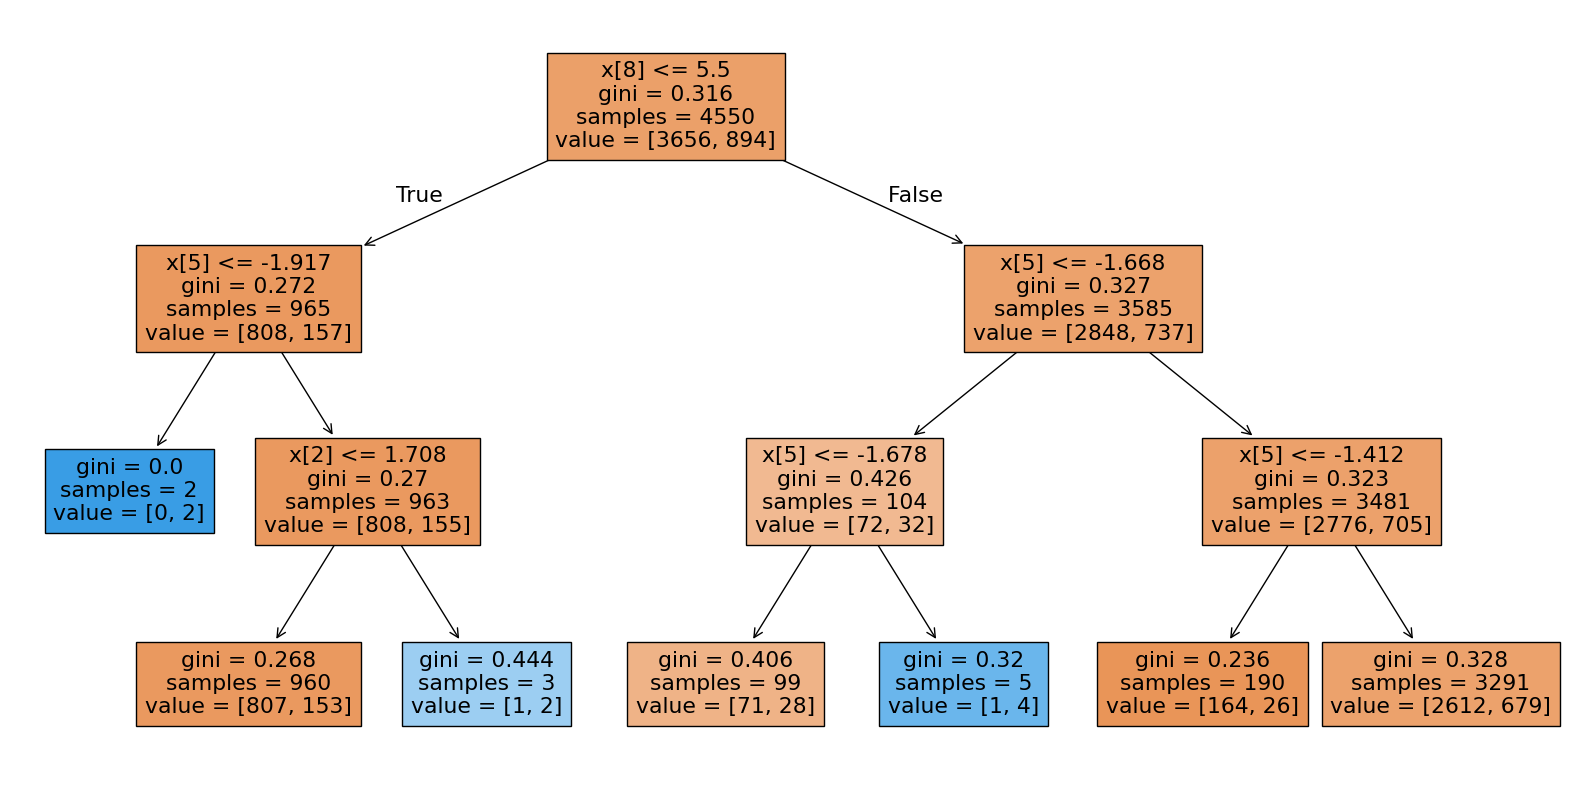

In [144]:
train_and_report_decision_tree(X_train_ord, X_test_ord, y_train, y_test, max_depth=3,plot=True)

## 3. Running Random Forest Model

In [141]:
from sklearn.ensemble import RandomForestClassifier

# Train and evaluate Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_ord, y_train)
y_pred_rf = rf_model.predict(X_test_ord)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7887179487179488


## 4. Feature Importance Analysis with Decision Tree

In [142]:
def plot_feature_importance(X, y, max_depth=None):

    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X, y)

    # Get feature importance
    importance = clf.feature_importances_
    features = np.array(num_cols + cat_cols)

    # Filter non-zero feature importance
    non_zero_idx = importance > 0
    non_zero_importance = importance[non_zero_idx]
    non_zero_features = features[non_zero_idx]

    # Sort features by importance
    sorted_idx = np.argsort(non_zero_importance)
    sorted_features = non_zero_features[sorted_idx]
    sorted_importance = non_zero_importance[sorted_idx]
    print(sorted_features, sorted_importance)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    bars = plt.barh(sorted_features, sorted_importance, color='skyblue')

    # Add value labels next to the bars
    for bar, value in zip(bars, sorted_importance):
        plt.text(bar.get_width() +0.002, bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center')

    # Remove x-ticks
    plt.xticks([])

    # Set labels and title
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance in Decision Tree with max_depth = {max_depth}')

    # Invert y-axis to have the most important feature on top
    plt.gca().invert_yaxis()

['estimated_salary' 'state' 'data_used'] [0.11268378 0.20473191 0.68258431]
['city' 'sms_sent' 'estimated_salary' 'age' 'calls_made' 'state'
 'data_used'] [0.03072601 0.0418796  0.08199819 0.13266661 0.15566835 0.16156658
 0.39549467]
['num_dependents' 'gender' 'telecom_partner' 'city' 'sms_sent' 'age'
 'state' 'calls_made' 'data_used' 'estimated_salary'] [0.00955059 0.01363783 0.04158383 0.04955298 0.09510304 0.10918093
 0.12943764 0.15754668 0.18884212 0.20556436]


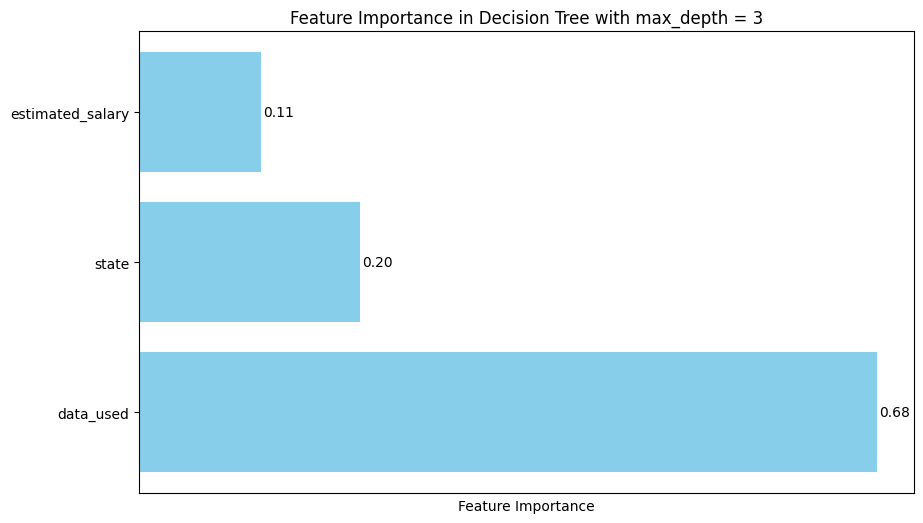

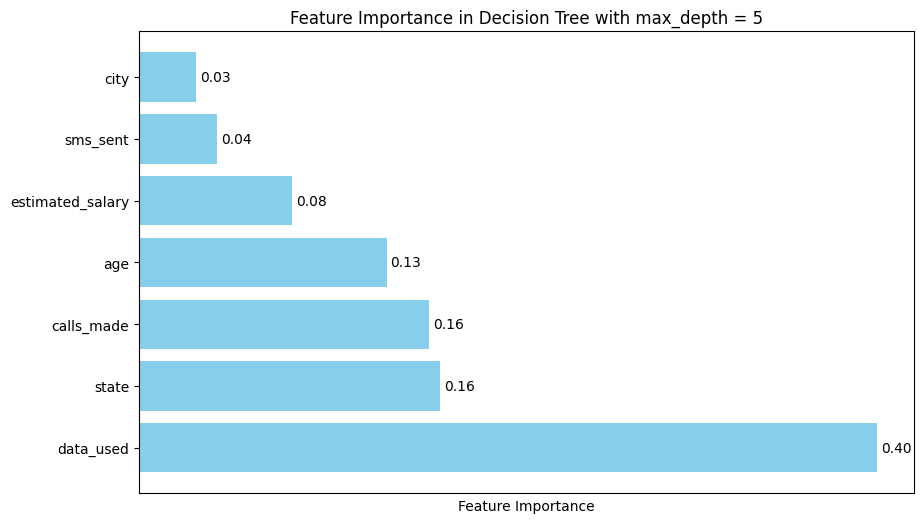

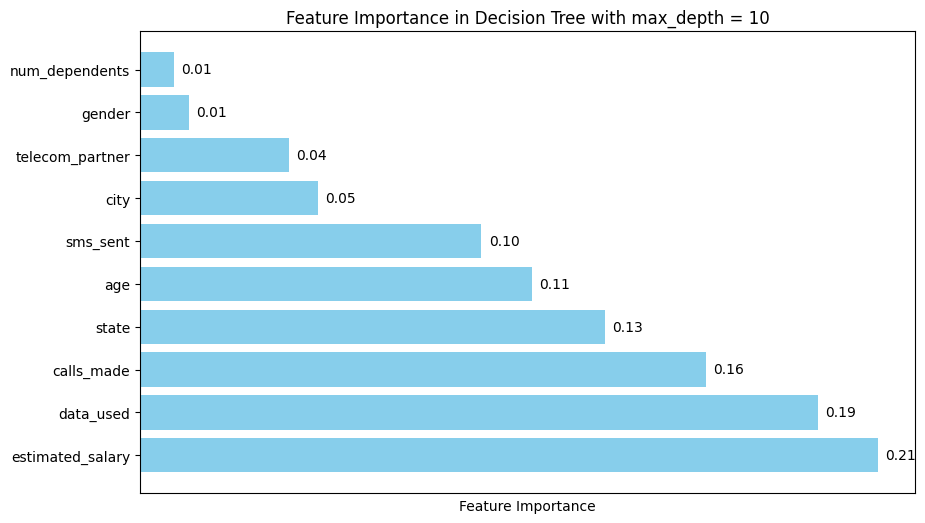

In [143]:
for depth in [3,5,10]:
    plot_feature_importance(X_train_ord, y_train, max_depth=depth)

Since we have a good fit at shallower depths, the `data_used` feature is the top predictor for churn.

Thus, customers who use a certain amount of data may be more likely to churn.